In [39]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

import sklearn.metrics as metrics
from sklearn.model_selection import validation_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from scipy.stats import uniform, randint
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore')



In [40]:
phone_data = pd.read_csv("./mobile_price.csv")
# phone_data = pd.read_csv("./spambase.csv")
phone_data.describe()
phone_input=phone_data.iloc[:,:-1]
phone_target=phone_data.iloc[:,-1]
# X=spam.iloc[:,:-1]
# y=spam.iloc[:,-1]

phone_train_input, phone_test_input, phone_train_target, phone_test_target = train_test_split(phone_input, phone_target,random_state = 42, test_size=0.3)
ss=StandardScaler()
ss.fit(phone_input)
phone_train_input = ss.transform(phone_train_input)
phone_test_input = ss.transform(phone_test_input)


In [41]:
dt = DecisionTreeClassifier(random_state=42,max_depth=2,min_samples_leaf=1)
ada = AdaBoostClassifier(dt)

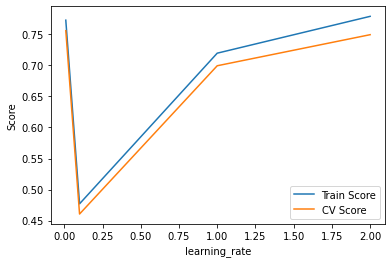

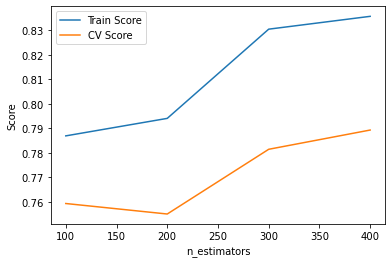

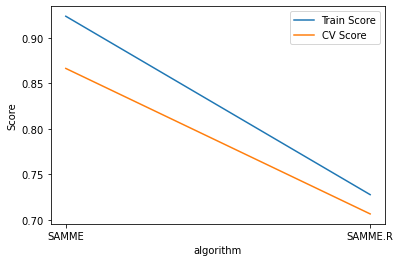

In [42]:
param_names = ['learning_rate','n_estimators', 'algorithm']
param_ranges = [[0,0.01,0.1,1,2], range(100,500,100), ['SAMME','SAMME.R']]
for i in range(len(param_names)):
    train_score, test_score = validation_curve(ada, phone_train_input,phone_train_target, param_name=param_names[i], param_range=param_ranges[i],cv=4)
    plt.figure()
    plt.plot(param_ranges[i], np.mean(train_score, axis=1),label='Train Score')
    plt.plot(param_ranges[i], np.mean(test_score, axis=1), label='CV Score')
    plt.xlabel(param_names[i])
    plt.ylabel('Score')
    plt.legend(loc='best')

In [43]:
param_grid = dict(zip(param_names,param_ranges))
gs = GridSearchCV(ada, param_grid, n_jobs = -1, cv = 5, verbose = 1)

In [44]:
gs.fit(phone_train_input, phone_train_target)
ada = gs.best_estimator_

Fitting 5 folds for each of 40 candidates, totalling 200 fits


In [45]:
print(gs.best_params_)
print(gs.best_score_)

{'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 300}
0.8885714285714286


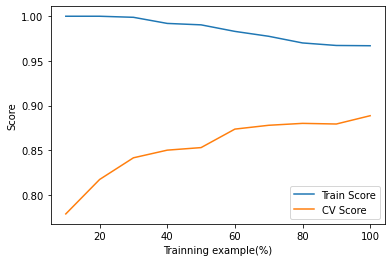

In [46]:
train_size, train_score, test_score = learning_curve(ada,phone_train_input, phone_train_target, train_sizes=np.linspace(0.1,1,10),cv=5)
plt.figure()
plt.plot(np.linspace(0.1,1,10)*100,np.mean(train_score,axis=1), label="Train Score")
plt.plot(np.linspace(0.1,1,10)*100,np.mean(test_score,axis=1), label="CV Score")
plt.legend(loc='best')
plt.xlabel("Trainning example(%)")
plt.ylabel("Score")
plt.show()

0.9642857142857143
0.9016666666666666


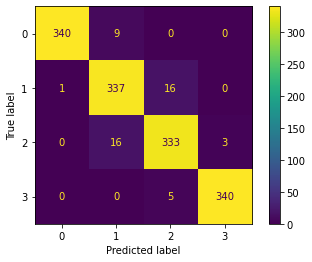

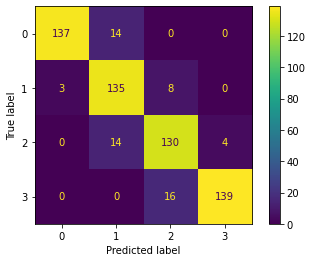

In [47]:
metrics.plot_confusion_matrix(ada, phone_train_input, phone_train_target)
metrics.plot_confusion_matrix(ada,phone_test_input, phone_test_target)
print(ada.score(phone_train_input, phone_train_target))
print(ada.score(phone_test_input, phone_test_target))